In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = "D:\\Datasets\\"
data_set = "OnlineRetail2.csv"

In [6]:
df = pd.read_csv(data_path+data_set)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df["TotalPrice"] = df.Quantity * df.UnitPrice

In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
df['months'] = df.InvoiceDate.dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,months
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [12]:
df_grp_month = df.groupby(["months"]).TotalPrice.agg(['mean']).sort_values("mean")
df_grp_month.head(12)

,mean
months,
1,15.933088
4,16.486399
7,17.240248
11,17.255802
12,17.390010
10,17.627089
2,17.976058
3,18.593313
6,18.742830


In [13]:
month_list = []
for i in df_grp_month.index.values:
    if i == 1:
        month_list.append("Jan")
    elif i == 2:
         month_list.append("Feb")
    elif i == 3:
         month_list.append("Mar")
    elif i == 4:
         month_list.append("Apr")
    elif i == 5:
         month_list.append("May")
    elif i == 6:
         month_list.append("Jun")
    elif i == 7:
         month_list.append("Jly")
    elif i == 8:
         month_list.append("Aug")
    elif i == 9:
        month_list.append("Sep")
    elif i == 10:
        month_list.append("Oct")
    elif i == 10:
        month_list.append("Nov")
    else: month_list.append("Dec")
            
print(month_list)       


['Jan', 'Apr', 'Jly', 'Dec', 'Dec', 'Oct', 'Feb', 'Mar', 'Jun', 'Aug', 'May', 'Sep']


In [14]:
df_grp_month["month_names"] = month_list
df_grp_month.head()

,mean,month_names
months,,
1,15.933088,Jan
4,16.486399,Apr
7,17.240248,Jly
11,17.255802,Dec
12,17.390010,Dec


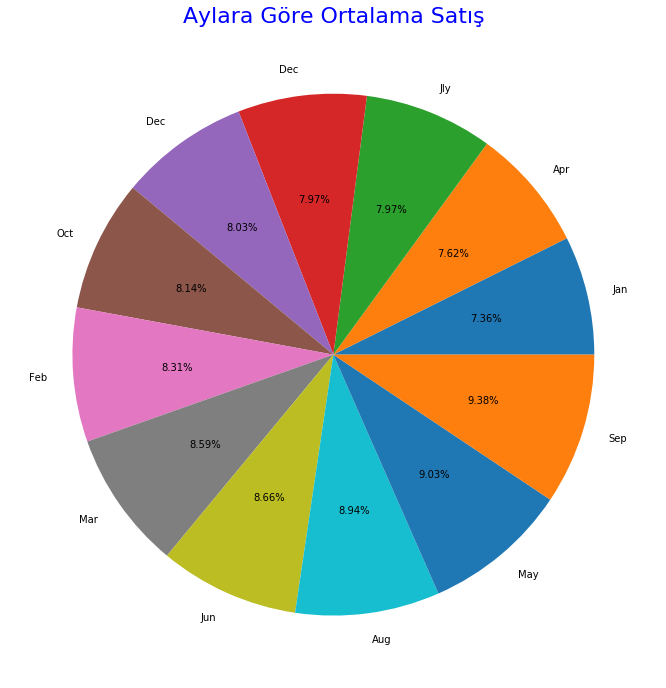

In [15]:
# colors = ['grey','blue','red','yellow','green','brown'] istenirse renkler elle belirlenebilir 
plt.figure(figsize = (12,12))
plt.pie(df_grp_month["mean"], labels=df_grp_month["month_names"], autopct='%1.2f%%') # autopct='%1.2f%%' yüzdelik oranlar
plt.title('Aylara Göre Ortalama Satış',color = 'blue',fontsize = 22)
plt.show()

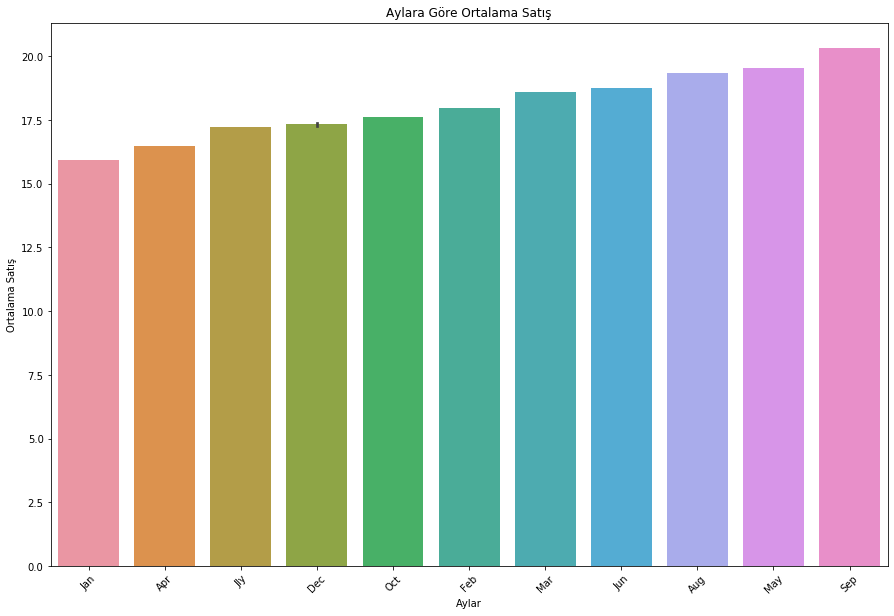

In [16]:

plt.figure(figsize=(15,10))
sns.barplot(x=df_grp_month["month_names"], y=df_grp_month['mean'])
plt.xticks(rotation= 45)
plt.xlabel('Aylar')
plt.ylabel('Ortalama Satış')
plt.title('Aylara Göre Ortalama Satış')
plt.show()